In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [2]:
data=pd.read_csv('train.csv' ,encoding ='cp949')
dataP = data.copy()


In [3]:
#필요한 모듈 불러오기 

import pandas as pd
import numpy as np


!pip install pandas_profiling
import pandas_profiling as pp

!pip install imblearn
import matplotlib.pyplot as plt
import scipy as sp
import seaborn as sns
from pandas import Series, DataFrame
from matplotlib import font_manager, rc
import platform
sns.set(style='whitegrid', palette='muted')
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings('ignore')
import missingno as msno


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 18 columns):
custid       5000 non-null int64
gender       5000 non-null int64
총구매액         5000 non-null int64
구매건수         5000 non-null int64
평균구매가격       5000 non-null int64
평균할부개월수      5000 non-null float64
구매브랜드종류      5000 non-null int64
내점일수         5000 non-null int64
수입상품_구매비율    5000 non-null float64
주말방문비율       5000 non-null float64
가을_구매건수      4055 non-null float64
겨울_구매건수      4103 non-null float64
봄_구매건수       4311 non-null float64
여름_구매건수      3978 non-null float64
아침_구매건수      3558 non-null float64
저녁_구매건수      4033 non-null float64
점심_구매건수      4855 non-null float64
주구매코너        5000 non-null object
dtypes: float64(10), int64(7), object(1)
memory usage: 703.2+ KB


In [5]:
data['주구매코너'].head(20)

0       화장품
1      영캐주얼
2       장신구
3       화장품
4       피혁A
5      영캐주얼
6     유니캐주얼
7       화장품
8       화장품
9       화장품
10      피혁A
11    유니캐주얼
12      화장품
13    유니캐주얼
14      화장품
15       섬유
16     영캐주얼
17      화장품
18      화장품
19     니트단품
Name: 주구매코너, dtype: object

In [6]:
obj=['주구매코너']

In [7]:
data[obj]

,주구매코너
0,화장품
1,영캐주얼
2,장신구
3,화장품
4,피혁A
...,...
4995,일반식품
4996,디자이너부띠끄
4997,화장품
4998,피혁A


In [8]:
dataP = data.copy()

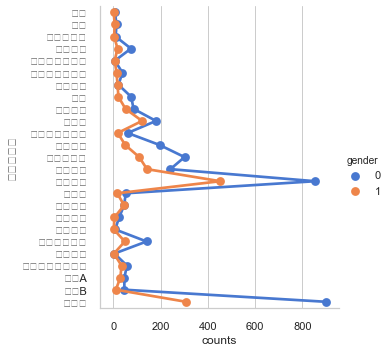

In [9]:
gender_catcnt = data.groupby(['gender', '주구매코너'])['custid'].agg('count').to_frame()
df_catecnt = gender_catcnt.reset_index()
df_catecnt.columns = ['gender', '주구매코너', 'counts']

sns.factorplot('counts', '주구매코너', hue='gender', data=df_catecnt)

In [10]:
pd.crosstab(data['주구매코너'],data['gender'], margins=True).style.background_gradient(cmap='summer_r')

gender,0,1,All
주구매코너,,,
가구,6,1,7
가전,13,5,18
기타바이어,9,3,12
니트단품,74,17,91
도자기크리스탈,6,5,11
디자이너부띠끄,38,13,51
문화완구,21,17,38
섬유,75,21,96
수입명품,85,51,136


In [11]:
col = dataP.columns
col

Index(['custid', 'gender', '총구매액', '구매건수', '평균구매가격', '평균할부개월수', '구매브랜드종류',
       '내점일수', '수입상품_구매비율', '주말방문비율', '가을_구매건수', '겨울_구매건수', '봄_구매건수',
       '여름_구매건수', '아침_구매건수', '저녁_구매건수', '점심_구매건수', '주구매코너'],
      dtype='object')

In [12]:
dataP.head()

,custid,gender,총구매액,구매건수,평균구매가격,평균할부개월수,구매브랜드종류,내점일수,수입상품_구매비율,주말방문비율,가을_구매건수,겨울_구매건수,봄_구매건수,여름_구매건수,아침_구매건수,저녁_구매건수,점심_구매건수,주구매코너
0,18,0,680100,15,45340,1.7,9,10,26.7,100.0,NaN,9.0,6.0,NaN,NaN,6.0,9.0,화장품
1,21,0,353450,9,39272,1.2,6,8,11.1,37.5,NaN,5.0,4.0,NaN,3.0,NaN,6.0,영캐주얼
2,23,0,5671400,36,157539,2.8,22,16,5.6,37.5,7.0,17.0,12.0,NaN,10.0,11.0,15.0,장신구
3,26,0,1964000,28,70143,1.4,15,14,39.3,28.6,5.0,8.0,15.0,NaN,NaN,18.0,10.0,화장품
4,35,0,885000,5,177000,6.0,5,2,0.0,100.0,NaN,NaN,5.0,NaN,NaN,5.0,NaN,피혁A


In [13]:
dataP = dataP.rename ( {'총구매액' : 'sum'} , axis = 'columns' )

In [14]:
import pandas as pd

In [15]:
dataP.columns

Index(['custid', 'gender', 'sum', '구매건수', '평균구매가격', '평균할부개월수', '구매브랜드종류',
       '내점일수', '수입상품_구매비율', '주말방문비율', '가을_구매건수', '겨울_구매건수', '봄_구매건수',
       '여름_구매건수', '아침_구매건수', '저녁_구매건수', '점심_구매건수', '주구매코너'],
      dtype='object')

In [16]:
dataP = dataP.rename ( {'총구매액' : 'sum', '구매건수' : 'countall', '평균구매가격' : 'avercost', '평균할부개월수' : 'avercostmonth', '구매브랜드종류' : 'brand',
       '내점일수' : 'howmanyday', '수입상품_구매비율' : 'foreigngoods', '주말방문비율' : 'weekend', '가을_구매건수' : 'fall', '겨울_구매건수' : 'winter', '봄_구매건수' : 'spring',
       '여름_구매건수' : 'summmer', '아침_구매건수' : 'morning', '저녁_구매건수' : 'night', '점심_구매건수' : 'afternoon', '주구매코너' : 'mainconner'},axis = 'columns')

In [17]:
data['주구매코너'] = data['주구매코너'].astype('category')
data['주구매코너'] = data['주구매코너'].cat.codes
data['주구매코너'].value_counts()

14    1306
24    1206
12     410
13     383
9      301
11     246
19     188
8      136
7       96
21      91
3       91
16      90
10      78
22      75
15      68
23      56
5       51
6       38
17      28
1       18
2       12
4       11
18       8
0        7
20       6
Name: 주구매코너, dtype: int64

In [18]:
dataP=data.copy()

In [19]:
dataP.isnull().sum()

custid          0
gender          0
총구매액            0
구매건수            0
평균구매가격          0
평균할부개월수         0
구매브랜드종류         0
내점일수            0
수입상품_구매비율       0
주말방문비율          0
가을_구매건수       945
겨울_구매건수       897
봄_구매건수        689
여름_구매건수      1022
아침_구매건수      1442
저녁_구매건수       967
점심_구매건수       145
주구매코너           0
dtype: int64

In [20]:
dataP.shape

(5000, 18)

In [21]:
dataP_drop = dataP.dropna(subset=['가을_구매건수','겨울_구매건수','봄_구매건수','여름_구매건수','아침_구매건수','저녁_구매건수','점심_구매건수' ])
dataP_drop.shape

(2235, 18)

In [22]:
dataP_drop.isnull().sum()

custid       0
gender       0
총구매액         0
구매건수         0
평균구매가격       0
평균할부개월수      0
구매브랜드종류      0
내점일수         0
수입상품_구매비율    0
주말방문비율       0
가을_구매건수      0
겨울_구매건수      0
봄_구매건수       0
여름_구매건수      0
아침_구매건수      0
저녁_구매건수      0
점심_구매건수      0
주구매코너        0
dtype: int64

In [23]:
con = ['가을_구매건수','겨울_구매건수','봄_구매건수','여름_구매건수','아침_구매건수','저녁_구매건수','점심_구매건수' ]

In [24]:
from sklearn.impute import SimpleImputer
imputer_con = SimpleImputer(strategy="most_frequent")  
imputer_con.fit(dataP[con])

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='most_frequent', verbose=0)

In [25]:
x = imputer_con.transform(dataP[con]); x

array([[ 1.,  9.,  6., ...,  1.,  6.,  9.],
       [ 1.,  5.,  4., ...,  3.,  1.,  6.],
       [ 7., 17., 12., ..., 10., 11., 15.],
       ...,
       [12.,  6.,  6., ..., 16.,  1., 21.],
       [ 6.,  4.,  2., ...,  1.,  2., 11.],
       [ 6.,  5., 10., ...,  8.,  5., 19.]])

In [26]:
dataP[con] = x
dataP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 18 columns):
custid       5000 non-null int64
gender       5000 non-null int64
총구매액         5000 non-null int64
구매건수         5000 non-null int64
평균구매가격       5000 non-null int64
평균할부개월수      5000 non-null float64
구매브랜드종류      5000 non-null int64
내점일수         5000 non-null int64
수입상품_구매비율    5000 non-null float64
주말방문비율       5000 non-null float64
가을_구매건수      5000 non-null float64
겨울_구매건수      5000 non-null float64
봄_구매건수       5000 non-null float64
여름_구매건수      5000 non-null float64
아침_구매건수      5000 non-null float64
저녁_구매건수      5000 non-null float64
점심_구매건수      5000 non-null float64
주구매코너        5000 non-null int8
dtypes: float64(10), int64(7), int8(1)
memory usage: 669.1 KB


In [27]:
dataP[con].head()

,가을_구매건수,겨울_구매건수,봄_구매건수,여름_구매건수,아침_구매건수,저녁_구매건수,점심_구매건수
0,1.0,9.0,6.0,1.0,1.0,6.0,9.0
1,1.0,5.0,4.0,1.0,3.0,1.0,6.0
2,7.0,17.0,12.0,1.0,10.0,11.0,15.0
3,5.0,8.0,15.0,1.0,1.0,18.0,10.0
4,1.0,1.0,5.0,1.0,1.0,5.0,2.0


In [28]:
dataP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 18 columns):
custid       5000 non-null int64
gender       5000 non-null int64
총구매액         5000 non-null int64
구매건수         5000 non-null int64
평균구매가격       5000 non-null int64
평균할부개월수      5000 non-null float64
구매브랜드종류      5000 non-null int64
내점일수         5000 non-null int64
수입상품_구매비율    5000 non-null float64
주말방문비율       5000 non-null float64
가을_구매건수      5000 non-null float64
겨울_구매건수      5000 non-null float64
봄_구매건수       5000 non-null float64
여름_구매건수      5000 non-null float64
아침_구매건수      5000 non-null float64
저녁_구매건수      5000 non-null float64
점심_구매건수      5000 non-null float64
주구매코너        5000 non-null int8
dtypes: float64(10), int64(7), int8(1)
memory usage: 669.1 KB


In [29]:
dataP.isnull().sum()

custid       0
gender       0
총구매액         0
구매건수         0
평균구매가격       0
평균할부개월수      0
구매브랜드종류      0
내점일수         0
수입상품_구매비율    0
주말방문비율       0
가을_구매건수      0
겨울_구매건수      0
봄_구매건수       0
여름_구매건수      0
아침_구매건수      0
저녁_구매건수      0
점심_구매건수      0
주구매코너        0
dtype: int64

#  여기까지 널값 날리고 1차 가공 끝

In [30]:
dataP['구매율'] = ((dataP['구매건수'] / dataP['내점일수'])*100).round()

dataP['구매다양성'] = ((dataP['구매건수'] / dataP['구매브랜드종류'])*100).round()


In [31]:
dataP.head()

,custid,gender,총구매액,구매건수,평균구매가격,평균할부개월수,구매브랜드종류,내점일수,수입상품_구매비율,주말방문비율,가을_구매건수,겨울_구매건수,봄_구매건수,여름_구매건수,아침_구매건수,저녁_구매건수,점심_구매건수,주구매코너,구매율,구매다양성
0,18,0,680100,15,45340,1.7,9,10,26.7,100.0,1.0,9.0,6.0,1.0,1.0,6.0,9.0,24,150.0,167.0
1,21,0,353450,9,39272,1.2,6,8,11.1,37.5,1.0,5.0,4.0,1.0,3.0,1.0,6.0,11,112.0,150.0
2,23,0,5671400,36,157539,2.8,22,16,5.6,37.5,7.0,17.0,12.0,1.0,10.0,11.0,15.0,15,225.0,164.0
3,26,0,1964000,28,70143,1.4,15,14,39.3,28.6,5.0,8.0,15.0,1.0,1.0,18.0,10.0,24,200.0,187.0
4,35,0,885000,5,177000,6.0,5,2,0.0,100.0,1.0,1.0,5.0,1.0,1.0,5.0,2.0,22,250.0,100.0


In [32]:
col = dataP.columns 

In [33]:
col

Index(['custid', 'gender', '총구매액', '구매건수', '평균구매가격', '평균할부개월수', '구매브랜드종류',
       '내점일수', '수입상품_구매비율', '주말방문비율', '가을_구매건수', '겨울_구매건수', '봄_구매건수',
       '여름_구매건수', '아침_구매건수', '저녁_구매건수', '점심_구매건수', '주구매코너', '구매율', '구매다양성'],
      dtype='object')

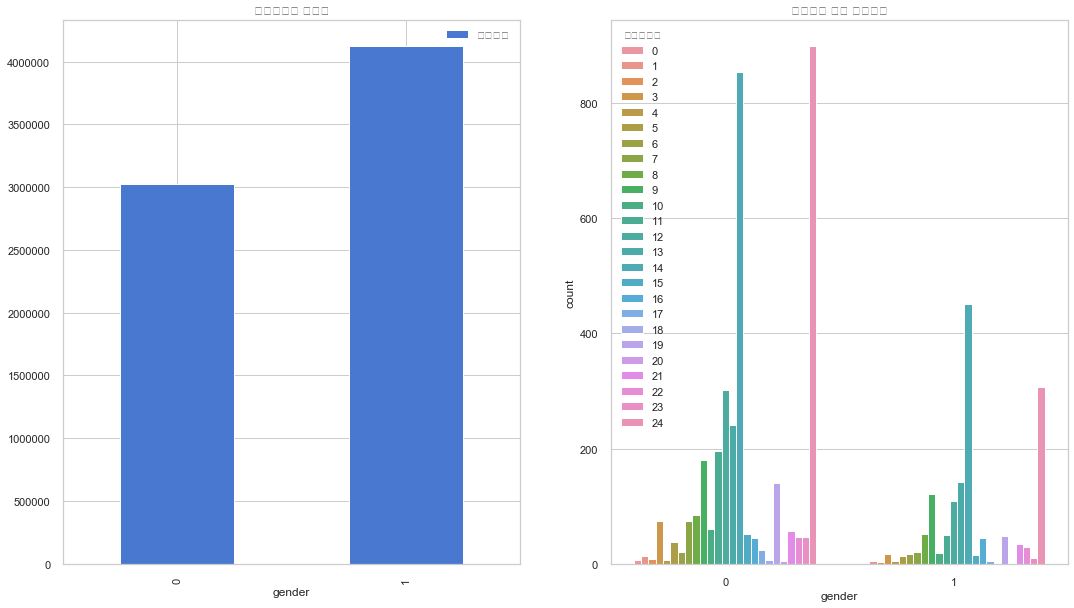

In [34]:
f, ax = plt.subplots(1, 2, figsize=(18, 10))
dataP[['gender', '총구매액']].groupby(['gender'], as_index=True).mean().plot.bar(ax=ax[0])
ax[0].set_title('성별에따른 구매액')
sns.countplot('gender', hue='주구매코너', data=dataP, ax=ax[1])
ax[1].set_title('구매코너 구매 성별예측')
plt.show()

# 상관관계 확인 visualization

In [35]:
import matplotlib.pyplot as plt
%matplotlib inline

In [36]:
import scipy as sp
import seaborn as sns

In [37]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [42]:
# 남녀 모두 있는 데이터의 상관관계 확인

In [43]:
dataP.corr().gender.sort_values(ascending=False)

gender       1.000000
custid       0.262472
아침_구매건수      0.125613
여름_구매건수      0.101369
총구매액         0.099137
점심_구매건수      0.097330
구매건수         0.094022
가을_구매건수      0.087848
내점일수         0.084255
구매브랜드종류      0.083988
봄_구매건수       0.075762
평균구매가격       0.072181
구매다양성        0.064997
겨울_구매건수      0.064887
구매율          0.049078
주말방문비율       0.020457
평균할부개월수     -0.020066
저녁_구매건수     -0.021091
수입상품_구매비율   -0.021294
주구매코너       -0.039270
Name: gender, dtype: float64

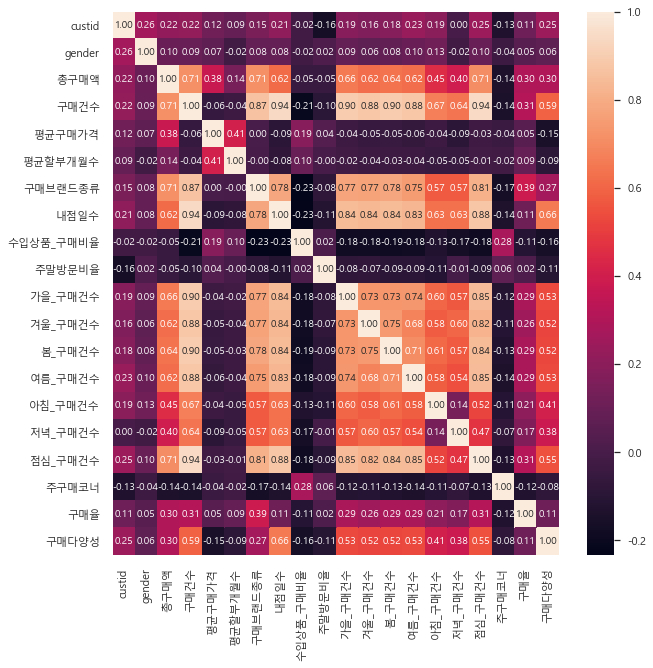

In [44]:
import matplotlib

if platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)

matplotlib.rcParams['axes.unicode_minus'] = False

%matplotlib inline 
import matplotlib.pyplot as plt 
import seaborn as sns    

plt.figure(figsize=(10,10))
sns.heatmap(data = dataP.corr(), annot=True, 
fmt = '.2f')

In [45]:
del_col = ['주구매코너', '수입상품_구매비율', 'gender','저녁_구매건수','평균할부개월수']
y = dataP.gender
x = dataP.drop(del_col, axis=1)
x.head()

,custid,총구매액,구매건수,평균구매가격,구매브랜드종류,내점일수,주말방문비율,가을_구매건수,겨울_구매건수,봄_구매건수,여름_구매건수,아침_구매건수,점심_구매건수,구매율,구매다양성
0,18,680100,15,45340,9,10,100.0,1.0,9.0,6.0,1.0,1.0,9.0,150.0,167.0
1,21,353450,9,39272,6,8,37.5,1.0,5.0,4.0,1.0,3.0,6.0,112.0,150.0
2,23,5671400,36,157539,22,16,37.5,7.0,17.0,12.0,1.0,10.0,15.0,225.0,164.0
3,26,1964000,28,70143,15,14,28.6,5.0,8.0,15.0,1.0,1.0,10.0,200.0,187.0
4,35,885000,5,177000,5,2,100.0,1.0,1.0,5.0,1.0,1.0,2.0,250.0,100.0


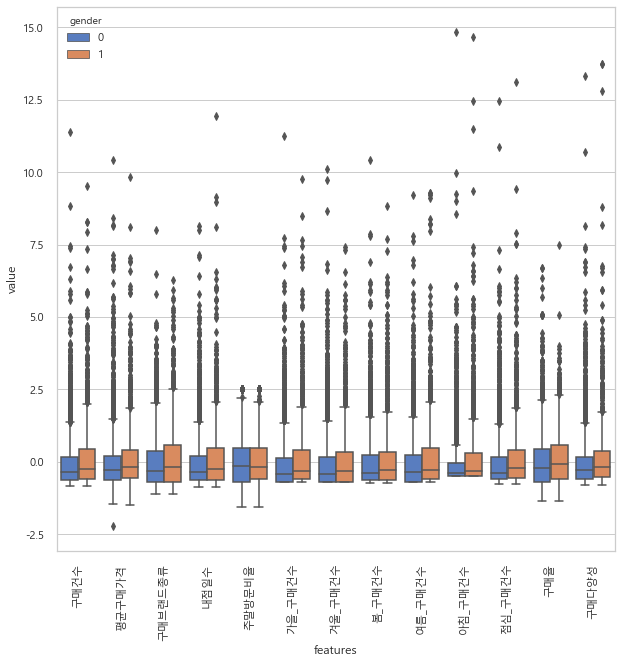

In [46]:

graph_data = (x - x.mean()) / (x.std())
graph_data = pd.concat([y, graph_data.iloc[:,2:]], axis=1)
graph_data = pd.melt(graph_data, id_vars='gender',var_name='features', value_name='value')
plt.figure(figsize=(10,10))
sns.boxplot(x='features', y='value', hue='gender', data=graph_data)
plt.xticks(rotation=90);

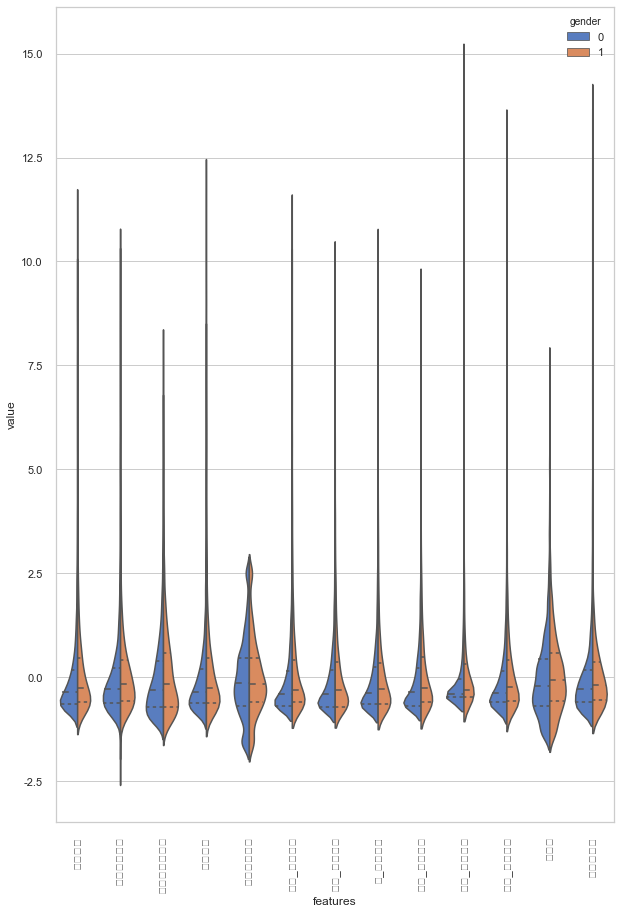

In [47]:



sns.set(style='whitegrid', palette='muted')
graph_data = (x - x.mean()) / (x.std())
graph_data = pd.concat([y, graph_data.iloc[:,2:]], axis=1)
graph_data = pd.melt(graph_data, id_vars='gender',var_name='features', value_name='value')
plt.figure(figsize=(10,15))
sns.violinplot(x='features', y='value', hue='gender', data=graph_data, split=True, inner='quart')
plt.xticks(rotation=90);

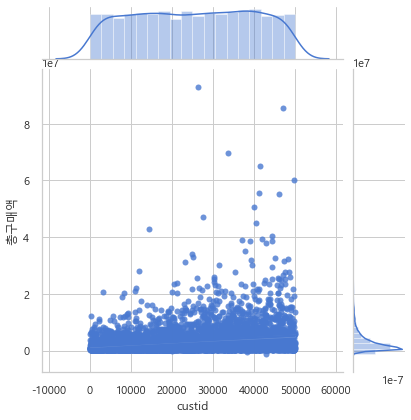

In [48]:
import matplotlib

if platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)

matplotlib.rcParams['axes.unicode_minus'] = False


sns.jointplot(x.loc[:, 'custid'], x.loc[:, '총구매액'], kind='regg');

In [49]:
col

Index(['custid', 'gender', '총구매액', '구매건수', '평균구매가격', '평균할부개월수', '구매브랜드종류',
       '내점일수', '수입상품_구매비율', '주말방문비율', '가을_구매건수', '겨울_구매건수', '봄_구매건수',
       '여름_구매건수', '아침_구매건수', '저녁_구매건수', '점심_구매건수', '주구매코너', '구매율', '구매다양성'],
      dtype='object')

In [50]:
y = data.gender
x = data.drop(del_col, axis=1)

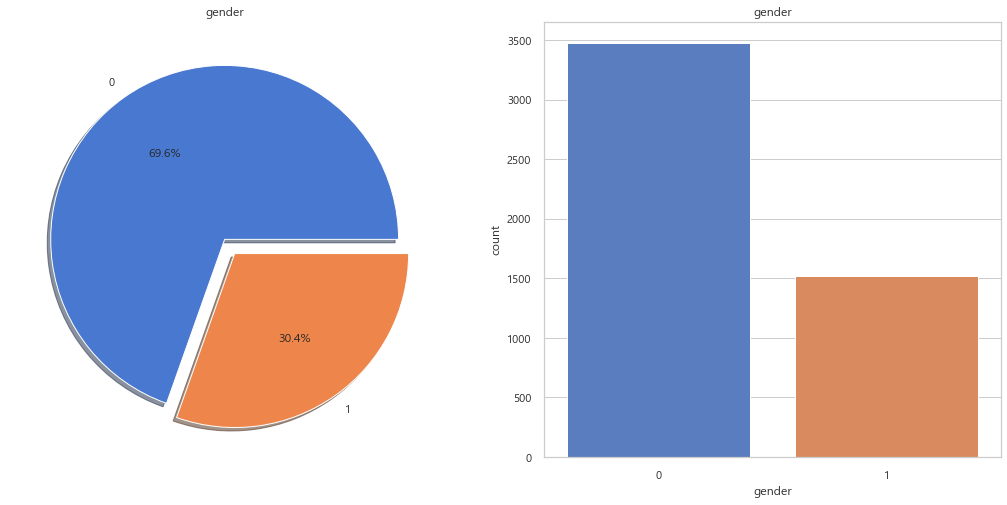

In [51]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data['gender'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('gender')
ax[0].set_ylabel('')
sns.countplot('gender',data=data,ax=ax[1])
ax[1].set_title('gender')
plt.show()


In [52]:
data.groupby(['gender','custid'])['gender'].count()

gender  custid
0       18        1
        21        1
        23        1
        26        1
        35        1
                 ..
1       49946     1
        49952     1
        49957     1
        49975     1
        49993     1
Name: gender, Length: 5000, dtype: int64

In [53]:

y = dataP.gender
x = dataP.drop(del_col, axis=1)
x

,custid,총구매액,구매건수,평균구매가격,구매브랜드종류,내점일수,주말방문비율,가을_구매건수,겨울_구매건수,봄_구매건수,여름_구매건수,아침_구매건수,점심_구매건수,구매율,구매다양성
0,18,680100,15,45340,9,10,100.0,1.0,9.0,6.0,1.0,1.0,9.0,150.0,167.0
1,21,353450,9,39272,6,8,37.5,1.0,5.0,4.0,1.0,3.0,6.0,112.0,150.0
2,23,5671400,36,157539,22,16,37.5,7.0,17.0,12.0,1.0,10.0,15.0,225.0,164.0
3,26,1964000,28,70143,15,14,28.6,5.0,8.0,15.0,1.0,1.0,10.0,200.0,187.0
4,35,885000,5,177000,5,2,100.0,1.0,1.0,5.0,1.0,1.0,2.0,250.0,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,49952,6666517,93,71683,27,39,43.6,13.0,33.0,14.0,33.0,8.0,44.0,238.0,344.0
4996,49954,3112100,17,183065,10,13,38.5,4.0,6.0,6.0,1.0,3.0,14.0,131.0,170.0
4997,49957,5852482,37,158175,14,21,19.0,12.0,6.0,6.0,13.0,16.0,21.0,176.0,264.0
4998,49975,654498,13,50346,10,7,14.3,6.0,4.0,2.0,1.0,1.0,11.0,186.0,130.0


In [54]:
x.describe()

,custid,총구매액,구매건수,평균구매가격,구매브랜드종류,내점일수,주말방문비율,가을_구매건수,겨울_구매건수,봄_구매건수,여름_구매건수,아침_구매건수,점심_구매건수,구매율,구매다양성
count,5000.000000,5.000000e+03,5000.000000,5000.0000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,25200.496600,3.360421e+06,34.538400,102564.0746,17.368800,18.054800,38.571880,8.437000,8.313000,9.253400,9.245600,6.464000,20.991800,183.878400,177.222800
std,14376.680764,5.088433e+06,40.109424,79091.0458,14.582432,19.369182,24.509818,10.805303,10.351467,11.394347,12.045161,11.291067,26.303066,62.266741,94.829703
min,18.000000,-1.237971e+06,1.000000,-72822.0000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,100.000000,100.000000
25%,12835.750000,7.223850e+05,10.000000,54811.0000,7.000000,6.000000,22.200000,1.000000,1.000000,2.000000,1.000000,1.000000,5.000000,140.750000,122.000000
50%,25345.000000,1.806748e+06,21.000000,82201.5000,13.000000,12.000000,34.850000,4.000000,5.000000,5.000000,5.000000,2.000000,12.000000,173.000000,155.000000
75%,37584.250000,4.030409e+06,44.000000,124142.7500,24.000000,23.000000,50.000000,11.000000,11.000000,12.000000,12.000000,7.000000,27.000000,214.000000,200.000000
max,49993.000000,9.286883e+07,491.000000,926117.0000,134.000000,249.000000,100.000000,130.000000,113.000000,128.000000,121.000000,174.000000,366.000000,650.000000,1480.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020EA34AFCC8>,
      dtype=object)

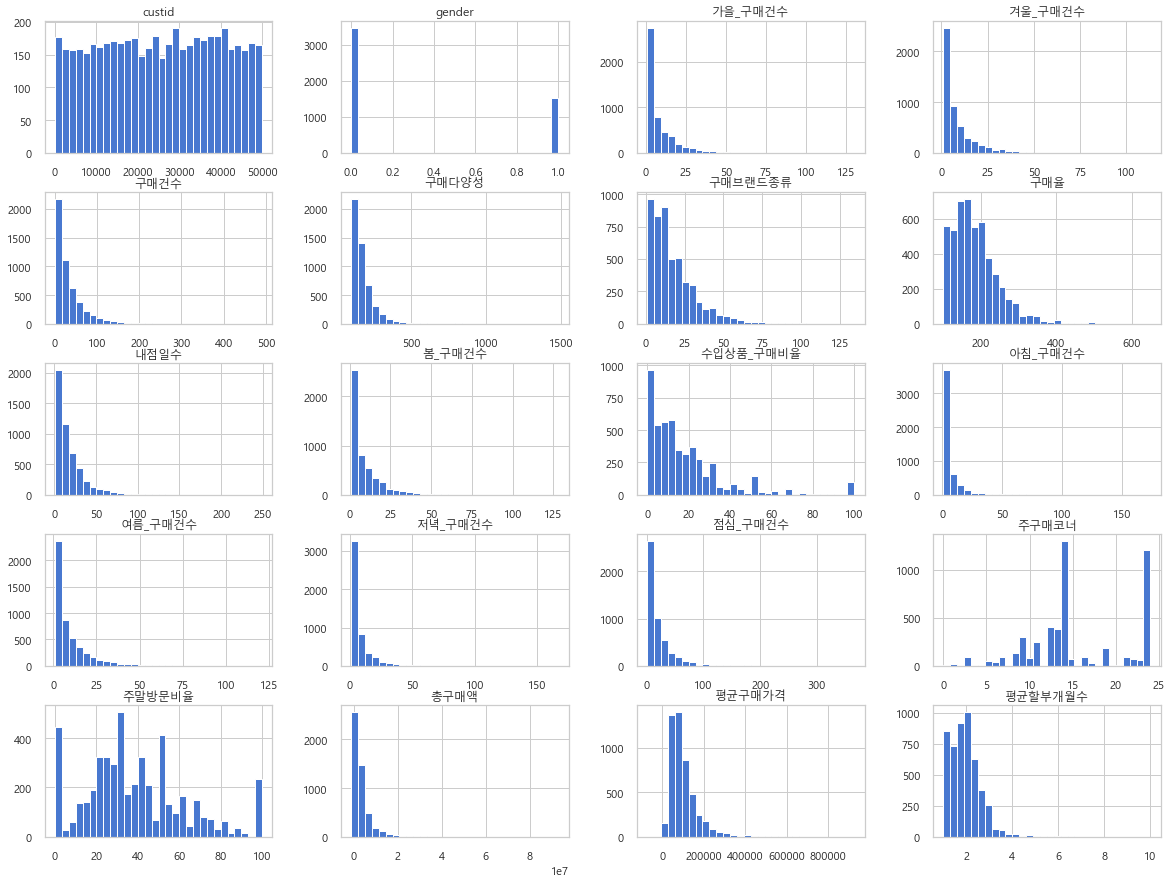

In [55]:
dataP.hist(bins=30, figsize=(20,15))

# Cross-Validation

In [56]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [57]:
dataP.head(30)

,custid,gender,총구매액,구매건수,평균구매가격,평균할부개월수,구매브랜드종류,내점일수,수입상품_구매비율,주말방문비율,가을_구매건수,겨울_구매건수,봄_구매건수,여름_구매건수,아침_구매건수,저녁_구매건수,점심_구매건수,주구매코너,구매율,구매다양성
0,18,0,680100,15,45340,1.7,9,10,26.7,100.0,1.0,9.0,6.0,1.0,1.0,6.0,9.0,24,150.0,167.0
1,21,0,353450,9,39272,1.2,6,8,11.1,37.5,1.0,5.0,4.0,1.0,3.0,1.0,6.0,11,112.0,150.0
2,23,0,5671400,36,157539,2.8,22,16,5.6,37.5,7.0,17.0,12.0,1.0,10.0,11.0,15.0,15,225.0,164.0
3,26,0,1964000,28,70143,1.4,15,14,39.3,28.6,5.0,8.0,15.0,1.0,1.0,18.0,10.0,24,200.0,187.0
4,35,0,885000,5,177000,6.0,5,2,0.0,100.0,1.0,1.0,5.0,1.0,1.0,5.0,2.0,22,250.0,100.0
5,50,0,3580200,36,99450,2.4,27,20,0.0,50.0,7.0,7.0,8.0,14.0,1.0,11.0,24.0,11,180.0,133.0
6,69,0,816300,14,58307,1.7,10,10,7.1,40.0,4.0,4.0,6.0,1.0,1.0,3.0,11.0,12,140.0,140.0
7,82,0,752200,5,150440,2.6,5,3,60.0,100.0,1.0,1.0,5.0,1.0,1.0,1.0,5.0,24,167.0,100.0
8,92,0,1145400,13,88108,1.9,7,9,23.1,22.2,1.0,1.0,2.0,10.0,1.0,8.0,4.0,24,144.0,186.0
9,100,0,442160,16,27635,1.0,10,6,25.0,33.3,1.0,5.0,11.0,1.0,1.0,3.0,13.0,24,267.0,160.0


In [58]:
dfX = dataP.drop(del_col, axis=1) 

In [59]:
dfy = dataP['gender']

In [60]:
dataP['gender'].value_counts()

0    3479
1    1521
Name: gender, dtype: int64

In [61]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

#model = KNeighborsClassifier()
model = LogisticRegression()
#model = DecisionTreeClassifier()

In [62]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [63]:
scores = cross_val_score(model, dfX, dfy); scores

array([0.695, 0.697, 0.696, 0.697, 0.655])

In [64]:
#### mean  / Std / Min / MAX 순이다

In [65]:
from sklearn.model_selection import train_test_split 

dfX = dataP.drop(del_col, axis=1)
dfy = dataP['gender']

X_train, X_test, y_train, y_test = train_test_split(dfX, dfy, test_size = 0.25, random_state = 0)

In [66]:
dataPre=dataP.drop(del_col, axis=1)

In [67]:
dataPre

,custid,총구매액,구매건수,평균구매가격,구매브랜드종류,내점일수,주말방문비율,가을_구매건수,겨울_구매건수,봄_구매건수,여름_구매건수,아침_구매건수,점심_구매건수,구매율,구매다양성
0,18,680100,15,45340,9,10,100.0,1.0,9.0,6.0,1.0,1.0,9.0,150.0,167.0
1,21,353450,9,39272,6,8,37.5,1.0,5.0,4.0,1.0,3.0,6.0,112.0,150.0
2,23,5671400,36,157539,22,16,37.5,7.0,17.0,12.0,1.0,10.0,15.0,225.0,164.0
3,26,1964000,28,70143,15,14,28.6,5.0,8.0,15.0,1.0,1.0,10.0,200.0,187.0
4,35,885000,5,177000,5,2,100.0,1.0,1.0,5.0,1.0,1.0,2.0,250.0,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,49952,6666517,93,71683,27,39,43.6,13.0,33.0,14.0,33.0,8.0,44.0,238.0,344.0
4996,49954,3112100,17,183065,10,13,38.5,4.0,6.0,6.0,1.0,3.0,14.0,131.0,170.0
4997,49957,5852482,37,158175,14,21,19.0,12.0,6.0,6.0,13.0,16.0,21.0,176.0,264.0
4998,49975,654498,13,50346,10,7,14.3,6.0,4.0,2.0,1.0,1.0,11.0,186.0,130.0


In [68]:
from sklearn.metrics import accuracy_score
from sklearn import datasets
from sklearn.preprocessing import StandardScaler


In [69]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
accuracy_score(y_test, y_pred)

0.688

In [70]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [71]:
# import the SMOTETomek.
from imblearn.combine import SMOTETomek

# create the  object with the desired sampling strategy.
smotemek = SMOTETomek(sampling_strategy='auto')

# fit the object to our training data.
X_train_smt, y_train_smt = smotemek.fit_sample(X_train, y_train)

Using TensorFlow backend.


In [72]:
# 정제하고 돌려보기

In [73]:
col

Index(['custid', 'gender', '총구매액', '구매건수', '평균구매가격', '평균할부개월수', '구매브랜드종류',
       '내점일수', '수입상품_구매비율', '주말방문비율', '가을_구매건수', '겨울_구매건수', '봄_구매건수',
       '여름_구매건수', '아침_구매건수', '저녁_구매건수', '점심_구매건수', '주구매코너', '구매율', '구매다양성'],
      dtype='object')

In [74]:
dfX

,custid,총구매액,구매건수,평균구매가격,구매브랜드종류,내점일수,주말방문비율,가을_구매건수,겨울_구매건수,봄_구매건수,여름_구매건수,아침_구매건수,점심_구매건수,구매율,구매다양성
0,18,680100,15,45340,9,10,100.0,1.0,9.0,6.0,1.0,1.0,9.0,150.0,167.0
1,21,353450,9,39272,6,8,37.5,1.0,5.0,4.0,1.0,3.0,6.0,112.0,150.0
2,23,5671400,36,157539,22,16,37.5,7.0,17.0,12.0,1.0,10.0,15.0,225.0,164.0
3,26,1964000,28,70143,15,14,28.6,5.0,8.0,15.0,1.0,1.0,10.0,200.0,187.0
4,35,885000,5,177000,5,2,100.0,1.0,1.0,5.0,1.0,1.0,2.0,250.0,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,49952,6666517,93,71683,27,39,43.6,13.0,33.0,14.0,33.0,8.0,44.0,238.0,344.0
4996,49954,3112100,17,183065,10,13,38.5,4.0,6.0,6.0,1.0,3.0,14.0,131.0,170.0
4997,49957,5852482,37,158175,14,21,19.0,12.0,6.0,6.0,13.0,16.0,21.0,176.0,264.0
4998,49975,654498,13,50346,10,7,14.3,6.0,4.0,2.0,1.0,1.0,11.0,186.0,130.0


In [75]:
display(X_train.shape, X_test.shape)
X_train.head()

(3750, 15)

(1250, 15)

,custid,총구매액,구매건수,평균구매가격,구매브랜드종류,내점일수,주말방문비율,가을_구매건수,겨울_구매건수,봄_구매건수,여름_구매건수,아침_구매건수,점심_구매건수,구매율,구매다양성
4154,41322,404285,3,134762,3,2,0.0,1.0,1.0,2.0,1.0,1.0,2.0,150.0,100.0
4820,48194,6169420,38,162353,29,26,34.6,8.0,13.0,7.0,10.0,13.0,25.0,146.0,131.0
1202,12393,2407157,32,75224,22,17,52.9,3.0,3.0,6.0,20.0,3.0,21.0,188.0,145.0
3759,37703,4664283,78,59798,24,22,45.5,17.0,12.0,29.0,20.0,1.0,55.0,355.0,325.0
622,6287,3299200,11,299927,9,3,33.3,1.0,1.0,11.0,1.0,1.0,11.0,367.0,122.0


In [76]:
x

,custid,총구매액,구매건수,평균구매가격,구매브랜드종류,내점일수,주말방문비율,가을_구매건수,겨울_구매건수,봄_구매건수,여름_구매건수,아침_구매건수,점심_구매건수,구매율,구매다양성
0,18,680100,15,45340,9,10,100.0,1.0,9.0,6.0,1.0,1.0,9.0,150.0,167.0
1,21,353450,9,39272,6,8,37.5,1.0,5.0,4.0,1.0,3.0,6.0,112.0,150.0
2,23,5671400,36,157539,22,16,37.5,7.0,17.0,12.0,1.0,10.0,15.0,225.0,164.0
3,26,1964000,28,70143,15,14,28.6,5.0,8.0,15.0,1.0,1.0,10.0,200.0,187.0
4,35,885000,5,177000,5,2,100.0,1.0,1.0,5.0,1.0,1.0,2.0,250.0,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,49952,6666517,93,71683,27,39,43.6,13.0,33.0,14.0,33.0,8.0,44.0,238.0,344.0
4996,49954,3112100,17,183065,10,13,38.5,4.0,6.0,6.0,1.0,3.0,14.0,131.0,170.0
4997,49957,5852482,37,158175,14,21,19.0,12.0,6.0,6.0,13.0,16.0,21.0,176.0,264.0
4998,49975,654498,13,50346,10,7,14.3,6.0,4.0,2.0,1.0,1.0,11.0,186.0,130.0


In [77]:
y

0       0
1       0
2       0
3       0
4       0
       ..
4995    1
4996    0
4997    1
4998    1
4999    1
Name: gender, Length: 5000, dtype: int64

In [78]:
# 트리 탐색
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth=6, random_state=0)

tree.fit(X_train_smt, y_train_smt)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [79]:
pred_tree = tree.predict(X_test); pred_tree

array([0, 1, 1, ..., 0, 1, 1], dtype=int64)

In [80]:
# 트리 확률
display(tree.score(X_train_smt, y_train_smt))
display(tree.score(X_test, y_test))

0.7404897245299519

0.588

In [81]:
# SVM 탐색
from sklearn.svm import SVC 
svm = SVC(random_state=0)
svm.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [82]:
# SVM 확률
display(svm.score(X_train_smt, y_train_smt))
display(svm.score(X_test, y_test))

0.5043725404459991

0.7072

In [83]:
# 신경망 탐색
from sklearn.neural_network import MLPClassifier 
mlp = MLPClassifier()
mlp.fit(X_train_smt, y_train_smt)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [84]:
# 신경망 확률
display(mlp.score(X_train_smt, y_train_smt))
display(mlp.score(X_test, y_test))

0.514648010494097

0.6936

In [85]:
# 랜덤 포레스트

from sklearn.ensemble import RandomForestClassifier

r_forest = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, n_estimators=70,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
r_forest.fit(X_train_smt, y_train_smt)




RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, n_estimators=70,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [86]:
display(r_forest.score(X_train_smt, y_train_smt))
display(r_forest.score(X_test, y_test))

0.9991254919108001

0.6208

In [87]:
# 그라디언트 부스팅
from sklearn.ensemble import GradientBoostingClassifier

g_boost = GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=8,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=2, min_samples_split=3,
                           min_weight_fraction_leaf=0.0, n_estimators=70,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
g_boost.fit(X_train_smt, y_train_smt)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=8,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=2, min_samples_split=3,
                           min_weight_fraction_leaf=0.0, n_estimators=70,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [88]:
display(g_boost.score(X_train_smt, y_train_smt))
display(g_boost.score(X_test, y_test))

0.9905990380411018

0.6264

In [89]:
from sklearn.ensemble import GradientBoostingClassifier

g_boost2 = GradientBoostingClassifier(learning_rate=0.001)
g_boost2.fit(X_train, y_train)

display(g_boost2.score(X_train_smt, y_train_smt))
display(g_boost2.score(X_test, y_test))

0.5

0.7064

In [90]:
from imblearn.under_sampling import NearMiss

# create the object with auto
near = NearMiss(sampling_strategy="not minority")

# fit the object to the training data.
x_train_near, y_train_near = near.fit_sample(X_train_smt, y_train_smt)

In [91]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier

In [92]:
logreg = LogisticRegression()
tree = DecisionTreeClassifier()
knn = KNeighborsClassifier()
voting = VotingClassifier(
    estimators = [('logreg', logreg), ('tree', tree), ('knn', knn)],
    voting = 'hard')

In [93]:
# 종합스코어

In [94]:
from sklearn.metrics import accuracy_score
for clf in (logreg, tree, knn, voting) :
    clf.fit(X_train, y_train)
    print(clf.__class__.__name__, 
          accuracy_score(y_test, clf.predict(X_test)))

LogisticRegression 0.688
DecisionTreeClassifier 0.624
KNeighborsClassifier 0.6544
VotingClassifier 0.6776


In [95]:
averaging = VotingClassifier(
    estimators = [('logreg', logreg), ('tree', tree), ('knn', knn)],
    voting = 'soft')
averaging.fit(X_train, y_train)

VotingClassifier(estimators=[('logreg',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('tree',
                              DecisionTreeClassifier(ccp_alpha=0.0,
                                                     class_weight=None,
                                                     criterion='...
                                        

In [96]:
averaging.fit(X_train, y_train).score(X_test, y_test)

0.6432

In [97]:
!pip install mlxtend

In [98]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
svm = SVC()
mlp = MLPClassifier(alpha=1)

In [99]:
from mlxtend.classifier import StackingClassifier
import numpy as np
np.random.seed(1671)

stacking = StackingClassifier(classifiers=[tree, knn, svm, mlp], 
                              meta_classifier=logreg, # blender or meta-learner
                              use_probas=False,
                              average_probas=False)

for clf in (tree, knn, svm, mlp, stacking) :
    clf.fit(X_train, y_train)
    print(clf.__class__.__name__, accuracy_score(
        y_test, clf.predict(X_test)))

DecisionTreeClassifier 0.6112
KNeighborsClassifier 0.6544
SVC 0.7072
MLPClassifier 0.6048
StackingClassifier 0.6184


In [100]:
# Bagging

In [101]:
from sklearn.ensemble import BaggingClassifier

bagging = BaggingClassifier(base_estimator=KNeighborsClassifier(), random_state=0, n_estimators=200)
bagging.fit(X_train, y_train).score(X_test, y_test)

0.6656

In [102]:
# Ada Boost

In [103]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(n_estimators=200, random_state=0)
ada.fit(X_train, y_train).score(X_test, y_test)

0.6744

In [104]:
# GradientBoost

In [105]:
from sklearn.ensemble import GradientBoostingClassifier

gbm = GradientBoostingClassifier(n_estimators=200, random_state=0)
gbm.fit(X_train, y_train).score(X_test, y_test)

0.684

In [106]:
# Voting

In [107]:
averaging = VotingClassifier(
    estimators = [('logreg', logreg), ('tree', tree), ('knn', knn)],
    voting = 'soft')
averaging.fit(X_train, y_train)

VotingClassifier(estimators=[('logreg',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('tree',
                              DecisionTreeClassifier(ccp_alpha=0.0,
                                                     class_weight=None,
                                                     criterion='...
                                        

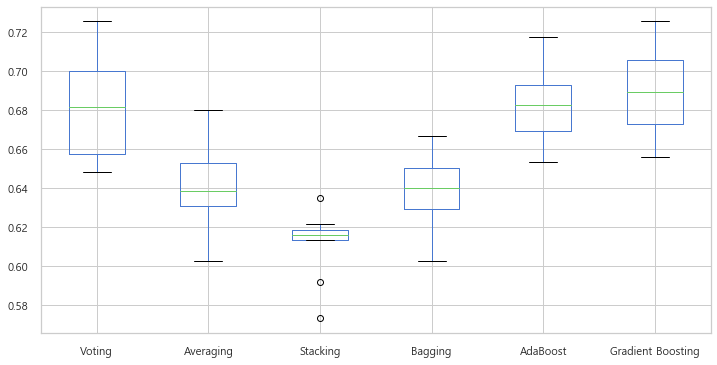

In [108]:
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction

kfold = KFold(n_splits=10, random_state=22) # k=10, split the data into 10 equal parts
xyz = []
accuracy = []
std = []
classifiers = ['Voting','Averaging','Stacking','Bagging','AdaBoost','Gradient Boosting']
models = [voting, averaging, stacking, bagging, ada, gbm]

for model in models:
    cv_result = cross_val_score(model, X_train, y_train, cv = kfold, scoring = "accuracy")
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)

models_dataframe = pd.DataFrame({'CV Mean':xyz,'Std':std},index=classifiers)       
plt.subplots(figsize=(12,6))
box = pd.DataFrame(accuracy,index=classifiers)
box.T.boxplot()

In [109]:
models_dataframe

,CV Mean,Std
Voting,0.680533,0.024637
Averaging,0.641600,0.020175
Stacking,0.611733,0.016229
Bagging,0.639467,0.018118
AdaBoost,0.683200,0.020372
Gradient Boosting,0.689333,0.020836


In [110]:
# PR 커브

In [111]:
from sklearn.metrics import precision_recall_curve

def plot_precision_recall_curve(precisions, recalls) :
    plt.plot(recalls, precisions, color='blue')
    plt.axis([0,1,0,1])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('PR curve')

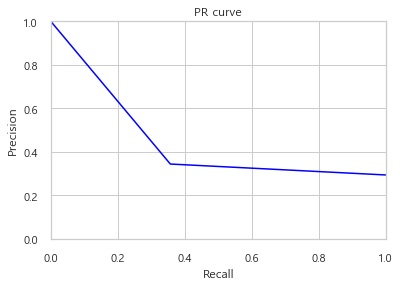

In [112]:
precisions, recalls, _ = precision_recall_curve(y_test, 
                                    tree.predict_proba(X_test)[:,1])
plot_precision_recall_curve(precisions, recalls)

In [113]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc


In [114]:
fpr, tpr, _ = roc_curve(y_test, tree.predict_proba(X_test)[:,1])
auc(fpr, tpr)

0.5369112605342822

In [115]:
# ROC커브

In [116]:
!pip install scikit-plot

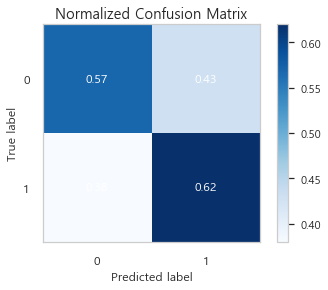

In [117]:
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y_test, pred_tree, normalize=True)


# LGBM 모델

In [118]:
from lightgbm import LGBMClassifier, plot_importance

# 칼럼명 모두 영어로 바꾸기

In [119]:
dataPre

,custid,총구매액,구매건수,평균구매가격,구매브랜드종류,내점일수,주말방문비율,가을_구매건수,겨울_구매건수,봄_구매건수,여름_구매건수,아침_구매건수,점심_구매건수,구매율,구매다양성
0,18,680100,15,45340,9,10,100.0,1.0,9.0,6.0,1.0,1.0,9.0,150.0,167.0
1,21,353450,9,39272,6,8,37.5,1.0,5.0,4.0,1.0,3.0,6.0,112.0,150.0
2,23,5671400,36,157539,22,16,37.5,7.0,17.0,12.0,1.0,10.0,15.0,225.0,164.0
3,26,1964000,28,70143,15,14,28.6,5.0,8.0,15.0,1.0,1.0,10.0,200.0,187.0
4,35,885000,5,177000,5,2,100.0,1.0,1.0,5.0,1.0,1.0,2.0,250.0,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,49952,6666517,93,71683,27,39,43.6,13.0,33.0,14.0,33.0,8.0,44.0,238.0,344.0
4996,49954,3112100,17,183065,10,13,38.5,4.0,6.0,6.0,1.0,3.0,14.0,131.0,170.0
4997,49957,5852482,37,158175,14,21,19.0,12.0,6.0,6.0,13.0,16.0,21.0,176.0,264.0
4998,49975,654498,13,50346,10,7,14.3,6.0,4.0,2.0,1.0,1.0,11.0,186.0,130.0


In [120]:
dataPre.columns = ['custid', 'total','count','average','brand','howmanyday','weekend','fall','winter','spring','summer','morning','afternoon','portionofbuying','diversityofbuying']

In [121]:
dataPre

,custid,total,count,average,brand,howmanyday,weekend,fall,winter,spring,summer,morning,afternoon,portionofbuying,diversityofbuying
0,18,680100,15,45340,9,10,100.0,1.0,9.0,6.0,1.0,1.0,9.0,150.0,167.0
1,21,353450,9,39272,6,8,37.5,1.0,5.0,4.0,1.0,3.0,6.0,112.0,150.0
2,23,5671400,36,157539,22,16,37.5,7.0,17.0,12.0,1.0,10.0,15.0,225.0,164.0
3,26,1964000,28,70143,15,14,28.6,5.0,8.0,15.0,1.0,1.0,10.0,200.0,187.0
4,35,885000,5,177000,5,2,100.0,1.0,1.0,5.0,1.0,1.0,2.0,250.0,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,49952,6666517,93,71683,27,39,43.6,13.0,33.0,14.0,33.0,8.0,44.0,238.0,344.0
4996,49954,3112100,17,183065,10,13,38.5,4.0,6.0,6.0,1.0,3.0,14.0,131.0,170.0
4997,49957,5852482,37,158175,14,21,19.0,12.0,6.0,6.0,13.0,16.0,21.0,176.0,264.0
4998,49975,654498,13,50346,10,7,14.3,6.0,4.0,2.0,1.0,1.0,11.0,186.0,130.0


In [122]:
dataPre

,custid,total,count,average,brand,howmanyday,weekend,fall,winter,spring,summer,morning,afternoon,portionofbuying,diversityofbuying
0,18,680100,15,45340,9,10,100.0,1.0,9.0,6.0,1.0,1.0,9.0,150.0,167.0
1,21,353450,9,39272,6,8,37.5,1.0,5.0,4.0,1.0,3.0,6.0,112.0,150.0
2,23,5671400,36,157539,22,16,37.5,7.0,17.0,12.0,1.0,10.0,15.0,225.0,164.0
3,26,1964000,28,70143,15,14,28.6,5.0,8.0,15.0,1.0,1.0,10.0,200.0,187.0
4,35,885000,5,177000,5,2,100.0,1.0,1.0,5.0,1.0,1.0,2.0,250.0,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,49952,6666517,93,71683,27,39,43.6,13.0,33.0,14.0,33.0,8.0,44.0,238.0,344.0
4996,49954,3112100,17,183065,10,13,38.5,4.0,6.0,6.0,1.0,3.0,14.0,131.0,170.0
4997,49957,5852482,37,158175,14,21,19.0,12.0,6.0,6.0,13.0,16.0,21.0,176.0,264.0
4998,49975,654498,13,50346,10,7,14.3,6.0,4.0,2.0,1.0,1.0,11.0,186.0,130.0


In [ ]:
y_probas = tree.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_probas)
plt.show()

In [ ]:
# Recall-Precision Curve

In [ ]:
skplt.metrics.plot_precision_recall(y_test, y_probas)
plt.show()

In [ ]:
# 리프트 커프

In [ ]:
skplt.metrics.plot_lift_curve(y_test, y_probas)
plt.show()

# 예측해서 test에 젠더 컬럼 만들기

In [ ]:

test = pd.read_csv('test.csv', encoding='CP949')

In [ ]:

test = test.fillna(0)
test.info()

In [ ]:
test['구매율'] = (test['구매건수'] / test['내점일수'])*100
test['구매다양성'] = (test['구매건수'] / test['구매브랜드종류'])*100

In [ ]:
test.head()

In [ ]:
test.drop(['평균할부개월수','수입상품_구매비율','저녁_구매건수','주구매코너'],axis=1)

In [ ]:
test['주구매코너'] = test['주구매코너'].astype('category')
test['주구매코너'] = test['주구매코너'].cat.codes
test['주구매코너'].value_counts()

In [ ]:
test = test.drop(['평균할부개월수','수입상품_구매비율','저녁_구매건수','주구매코너'],axis=1)

In [ ]:
test

In [ ]:
test.columns = ['custid', 'total','count','average','brand','howmanyday','weekend','fall','winter','spring','summer','morning','afternoon','portionofbuying','diversityofbuying']

In [ ]:
dataPre

In [ ]:

test['gender'] = tree.predict(test.loc[:,'custid':'구매다양성'])

In [ ]:
test

In [ ]:
test_gender = test['gender']

In [ ]:
test_gender.head()

In [ ]:
test_gender.to_excel('백화점 최종 성별 결과.xlsx')

In [ ]:
test.to_excel('백화점 최종성별 결과 모든 칼럼.xlsx')

In [ ]:
test['gender'].value_counts()